# Neural Networks

Neural networks can be used for supervised learning problems and we will start with this type of application in this section. Nevertheless, they are used for more, which is why I separate them from the supervised learning section. As you will see in the next chapter, they can be used for unsupervised learning tasks like dimensionality reduction (with the use of Autoencoders). Furthermore, they are used for artificial creation and imitation of real-life observations and processes like images or time series (with the use of Generative Adversarial Networks). Moreover, they are used in combination with reinforcement learning to train artificial agents to deal with episodic tasks like playing games or trading stocks (Deep Reinforcement Learning).

Why are neural networks so powerful and versatile? The short answer - because they are a powerful tool to approximate complex functional relationships. No matter the dimensionality of input and output, not matter of direct and indirect linear and non-linear dependencies, under certain conditions, neural networks are able to capture any functional relationship.

Different architectures for neural networks exist. We will focus on feed forward networks. First, we want to understand how they work, second, we will talk about the estimation of networks, and third, we also discuss interpretability and feature importance. Neural networks are often accused to be "black boxes" with a lack of interpretability. In my opinion, this is not true, and with a certain understanding, predictions of neural networks are transparent and important features can be identified.

## Architecture of Neural Networks

With the understanding of the baseline algorithms in the previous chapter, you already know what you need to know for understanding neural networks. In simplified terms, neural networks are a combination of linear predictors with non-linear transformation functions. Remember that for each baseline model, the building block is the linear predictor:

$$
Z_i = \boldsymbol{w}^T \boldsymbol{X}_i + b
$$

For the classification models, we simply combined the linear predictor with non-linear functions mapping the outcome to the number range of our needs, i.e., the sigmoid and the softmax function. Neural networks follow this principle but make use of it multiple times to generate a target prediction.

For simplicity, let us first ignore the use of any transformation function. Assume, we have one specific observation $(x_{i1}, x_{i2}, ..., x_{in}, y_i )$. For the moment, we skip the $i$ in subscript, but remember that this $(x_1, x_2, ..., x_n, y)$ refers to one observation in the data set. 

Now, for given model parameters, assume, we not just use one linear predictor, but $p$ linear predictors for this input which results in $p$ linear predictions. For instance, if $p = 2$, we get:

$$
\begin{align}
z_1 & = w_{11}^{(l)} x_{1} + w_{12}^{(l)} x_{2} + ... + w_{1n}^{(l)} x_{n} + b_1^{(l)} \\
z_2 & = w_{21}^{(l)} x_{1} + w_{22}^{(l)} x_{2} + ... + w_{2n}^{(l)} x_{n} + b_2^{(l)} \\
\end{align}
$$

or in matrix notation:

$$
\boldsymbol{z} = \boldsymbol{x}^T \boldsymbol{W}^{(l)} + \boldsymbol{b}^{(l)}
$$

Now, we use $z_1$ and $z_2$ as input for another linear predictor which returns our estimate for the target:

$$
\hat{y} = w_{11}^{(L)} z_{1} + w_{12}^{(L)} z_{2} + b^{(L)}
$$

You just witnessed a simplified version of a forward neural network which is shown in the figure below.

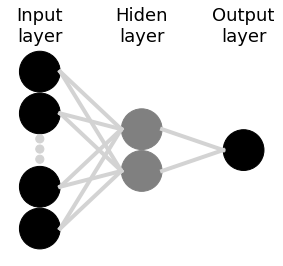

In [1]:
from nnv import NNV
import matplotlib.pylab as plt
layersList = [
    {"title":"Input\nlayer", "units": 5, "color": "black"},
    {"title":"Hiden\nlayer", "units": 2},
    {"title":"Output\nlayer", "units": 1,"color": "black"},
]

NNV(layersList).render()
plt.show()

Why simplified? Because, we omitted one essential aspect. So far, each predictor is only able to capture linear relationships due to the affine functional form. To capture non-linear relationships, linear predictors are composed with non-linear functions $g$ which are called activation functions in this context. We will show a few different activation functions after we discussed the architecture of a neural network. Assume, we add an activation function in the first step of the example above. This would lead to:

$$
\begin{align}
h_1^{(l)} & = g(z_1) = g \left(w_{11}^{(l)} x_{1} + w_{12}^{(l)} x_{2} + ... + w_{1n}^{(l)} x_{n} + b_1^{(l)} \right) \\
h_2^{(l)} & = g(z_2) = g \left( w_{21}^{(l)} x_{1} + w_{22}^{(l)} x_{2} + ... + w_{2n}^{(l)} x_{n} + b_2^{(l)} \right) \\
\end{align}
$$

or in matrix notation to:

$$
\boldsymbol{h} = g( \boldsymbol{z} ) = g \left(\boldsymbol{x}^T \boldsymbol{W}^{(l)} + \boldsymbol{b}^{(l)} \right)
$$

and finally to the target prediction:

$$
\hat{y} = w_{11}^{(L)} h_{1} + w_{12}^{(L)} h_{2} + b^{(L)}
$$

Okay, now let us generalize this together with a proper notation. Each neural network consists of $L$ **layers**. The first layer is called **input layer**, the last layer is called **output layer**. Layers between the input and the output layer are called hidden layers. Each layers consists of $p^{(l)}$ **neurons**, while the number of neurons is given by the number of features and the number of output neurons is determined by the output size of the target. In between the number of layers and neurons are hyperparameters and must be set by the user. 

For the example above, let us denote the input features as input neurons $(x_1, x_2, ..., x_n) = (h_1^{(1)}, h_2^{(2)}, ... , h_{p}^{(1)})$. With this notation, the neurons of the second layer are defined by:

$$
\begin{align}
h_1^{(2)} & = g(z_1) = g^{(1)} \left(w_{11}^{(1)} h_{1}^{(1)} + w_{12}^{(1)} h_{2}^{(1)} + ... + w_{1n}^{(1)} h_{n}^{(1)} + b_1^{(1)} \right) \\
h_2^{(2)} & = g(z_2) = g^{(1)} \left(w_{21}^{(1)} h_{1}^{(1)} + w_{22}^{(1)} h_{2}^{(1)} + ... + w_{2n}^{(1)} h_{n}^{(1)} + b_2^{(1)} \right) \\
\end{align}
$$

and we get the target prediction by:

$$
\hat{y} = h_1^{(3)} = w_{11}^{(2)} h_{1}^{(2)} + w_{12}^{(2)} h_{2}^{(2)} + b^{(2)}
$$

Accordingly, with a general notation, neurons for layer $l$ are generated by:

$$
\boldsymbol{h}^{(l)} = g^{(l - 1)} \left(\boldsymbol{h}^{(l - 1), T} \boldsymbol{W}^{(l - 1)} + \boldsymbol{b}^{(l - 1)}\right)
$$

Again, the idea is to make several predictions starting from the set of input features, these feature are then transformed to new features by means of transformed linear predictors, called neurons. This can be repeated multiple times until we say it is enough and end with a final prediction. Common choices regarding the number of hidden layers are one or two for common forward neural networks. This is due to phenomena called **vanishing** and **exploding** gradient problem. We will come back to this at a later stage. 

### Activation functions

A certain range of typical non-linear transformation functions for the choice of $g$ exist. You already know three choices, the identity, the sigmoid and the softmax function. Other popular examples are the **rectified linear unit** (ReLU) function:

$$
g(z) = \max \lbrace 0, z \rbrace
$$

the **exponential linear unit** (ELU) function, with $\alpha$ typically being a value between $0.10$ and $0.30$:

$$
g(z) = 
\begin{cases}
z & \text{if } z > 0\\
\alpha (e^z - 1) & \text{if } z < 0
\end{cases}
$$

the **scaled exponential unit** (SELU) function, with fixed parameters $\alpha, \lambda$:

$$
g(z) = \lambda
\begin{cases}
z & \text{if } z > 0\\
\alpha e^z - \alpha & \text{if } z \leq 0
\end{cases}
$$

or the **hyperbolic tangent function** (tanh):

$$
g(z) = \frac{e^{z} - e^{-z} }{e^{z} + e^{-z}}
$$

The figure below illustrated these functions.

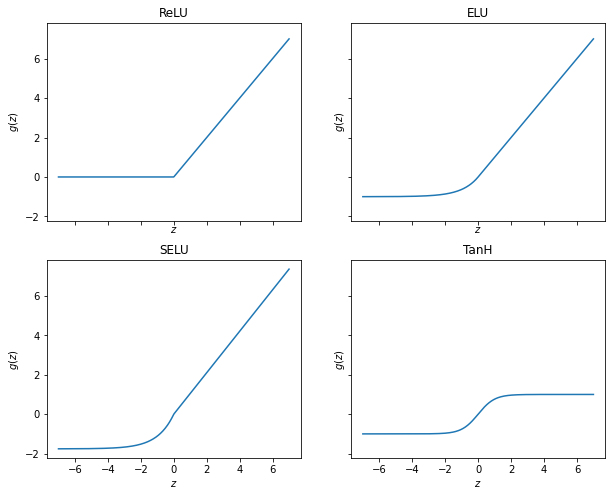

In [2]:
from tensorflow.keras import activations
import numpy as np
import matplotlib.pylab as plt

z = np.linspace(-7, 7, 500)
h_relu = activations.relu(z).numpy()
h_elu = activations.elu(z).numpy()
h_selu = activations.selu(z).numpy()
h_tanh = activations.tanh(z).numpy()

fig, axes = plt.subplots(2,2, sharex = True, sharey = True)
fig.set_figheight(8)
fig.set_figwidth(10)

axes[0,0].plot(z, h_relu)
axes[0,0].set_xlabel(r'$z$')
axes[0,0].set_ylabel(r'$g(z)$')
axes[0,0].set_title('ReLU')

axes[0,1].plot(z, h_elu)
axes[0,1].set_xlabel(r'$z$')
axes[0,1].set_ylabel(r'$g(z)$')
axes[0,1].set_title('ELU')

axes[1,0].plot(z, h_selu)
axes[1,0].set_xlabel(r'$z$')
axes[1,0].set_ylabel(r'$g(z)$')
axes[1,0].set_title('SELU')

axes[1,1].plot(z, h_tanh)
axes[1,1].set_xlabel(r'$z$')
axes[1,1].set_ylabel(r'$g(z)$')
axes[1,1].set_title('TanH')

plt.show()

In some cases, a certain activation function is mandatory for the purpose of the learning problem. However, for most of the time, choosing activation functions also belongs to the process of hyperparameter optimization. Up to today, more and more different activation functions are developed and suggested. 

### Baseline Models are Neural Networks

It maybe an interesting insight at this stage to understand that baseline models from the previous chapter are nested within the neural network structure. Easily spoken, each of the baseline models is a different neural network without a hidden layer. The linear regression model consists of an input layer, the identify function and a one-dimensional output neuron. The logistic regression model consists of an input layer, the sigmoid function and a one-dimensional output neuron. The multi-classification model consists of an input layer, the softmax activation function and $k$-dimensional output neurons.


## Estimation of Neural Networks

Neural networks are estimated by stochastic gradient descent methods. The only thing which gets a little more complex, is the derivation of partial derivatives with respect to model parameters. However, this should not be too much of a concern, because different software packages exist which derive gradients by auto-differentiation. What is most important is the correct choice of a loss function which is minimized to derive optimal parameter estimates. Fortunately for us, we can use the same loss functions as presented when discussing the baseline models. This means for regression problems, we use the mean-squared-error, for binary classification, we use the binary-cross-entropy and for multi-classification problems, we use the categorical-cross-entropy function. In each case the loss function receives target values and predictions. Target values are derived by the neural network which is a sequential composition of different functions. Whenever, we are in need of derivatives for composed function, the **chain rule** is most important. 

For two functions $f, g$, $f: D \to L$ and $g:L \to V$, the composition $g \circ f: D \to V$ with $(g \circ f)(x) = g\left(f(x)\right)$ can be differentiated by:

$$
\frac{\partial \left(g\left(f(x)\right)\right)}{\partial x} = \frac{\partial \left(g \left(f(x)\right)\right)}{\partial f(x)} \frac{\partial f(x)}{\partial x}
$$

If we go through a neural network from the input to the output layer, we are conducting a **forward pass**. When differentiating to derive partial derivatives for all weights and biases, we need to differentiate the way back from the loss function to the output, to the hidden layer(s) and to the input. This is called **backpropagation**

Let us revisit our simplified example from the beginning. Furthermore, let us assume, we have three input features $x_1, x_2, x_3$. In the hidden layer, we want to keep the two neurons, and for simplicity we only use the identity function to activate the neurons in the hidden and in the output layer. With our general notation, we have the input layer consisting of neurons $(x_1, x_2, x_3) = (h_1^{(1)}, h_2^{(1)}, h_3^{(1)})$. The hidden layer:

$$
\begin{align}
h_1^{(2)} & = w_{11}^{(1)} h_{1}^{(1)} + w_{12}^{(1)} h_{2}^{(1)} + ... + w_{1n}^{(1)} h_{n}^{(1)} + b_1^{(1)}  \\
h_2^{(2)} & = w_{21}^{(1)} h_{1}^{(1)} + w_{22}^{(1)} h_{2}^{(1)} + ... + w_{2n}^{(1)} h_{n}^{(1)} + b_2^{(1)}  \\
\end{align}
$$

The output layer:

$$
\hat{y} = h_1^{(3)} = w_{11}^{(2)} h_{1}^{(2)} + w_{12}^{(2)} h_{2}^{(2)} + b^{(2)}
$$

And assuming a regression problem, the loss function for this observation:

$$
L(y, \hat{y}) = \left(y - \hat{y}\right)^2
$$

In order to estimate weight and bias parameters by gradient descent, we need to partially derive the loss function with respect to every weight and bias. First let us take a look at weights and bias between the hidden and the output layer. The loss function does not directly depend on these values, but $\hat{y}$ directly depends on these values. To partially differentiate with respect to the weights, we can use the chain rule:

$$
\frac{\partial L}{\partial w_{11}^{(2)}} = \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial w_{11}^{(2)}} = 2 \left(y - \hat{y}\right)(-1)\cdot h_{1}^{(2)}
$$

$$
\frac{\partial L}{\partial w_{12}^{(2)}} = \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial w_{12}^{(2)}} = 2 \left(y - \hat{y}\right)(-1)\cdot h_{2}^{(2)}
$$

Accordingly, with respect to the bias, the partial derivative is given by:

$$
\frac{\partial L}{\partial b^{(2)}} = \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial b^{(2)}} = 2 \left(y - \hat{y}\right)(-1)\cdot 1
$$

You are probably already guessing, what happens, if we backpropagate to the weights and biases of the first layer. For instance, the partial derivative with respect to the weight $w_{11}^{(1)}$ is given by:

$$
\frac{\partial L}{\partial w_{11}^{(1)}} = \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial h_1^{(2)}} \frac{\partial h_1^{(2)}}{\partial w_{11}^{(1)}} = 2 \left(y - \hat{y}\right)(-1)\cdot w_{11}^{(1)} \cdot h_{1}^{(1)}
$$

We stop here, because you can see that it does not get more difficult to derive partial derivatives, only the way back gets longer. This holds true if we use other activation functions, but their use add another step in between for backpropagating from the loss function to the input features. As stated earlier, it is not important to manually derive partial derivatives, because this is done by efficient computer algorithms, however, it is very important to understand this concept in general and to combine this understanding with the gradient descent method. If you are at this point, it will be no problem to understand more advanced approaches of neural networks.

### Practical Issues for Estimation

Usually, features are normalized or standardized for the use with neural networks. This has numerical reasons because we apply various matrix multiplication for making target predictions. Especially in combination with some activation functions this can lead to high values, numerical instability and the inability to apply gradient descent properly. Furthermore, regarding the use of forward neural networks, it is recommended not to use too many hidden layers, otherwise, weights in the first layers may not get training by gradient descent due to the **vanishing gradient** problem. Often, activation functions like the sigmoid or the hyperbolic tangent function are used. Their gradients are typically small values between $(0, 1)$. This in combination with the chain rule generates partial derivatives which consists of multiple multiplications of small numbers. As a consequence, partial derivatives with respect to weights and biases in the first layers are so small, that almost no update occurs for the parameters. Thus, the model is not able to learn adequate parameter values. Another problem which works in the opposite direction is the **exploding gradient** problem. Sometimes, partial derivatives can be very steep leading to high numerical values. Especially, if this reoccurs during backpropagation, it may lead to exponentially growing gradients. This results in very high weight and bias updates which can lead to numerical problems and the incapability of the model to learn adequate parameters. Certain methods exists to fix these issues, but for the moment, just remember that these problem exists and search for assistance in the literature when you encounter them. Regarding forward neural network, it usually is not a problem when input features are adequately preprocessed and common and appropriate activation functions are used.

## Software Implementation - Tensorflow and Keras

Basically, all you need for estimating parameters of neural networks is a tool which automatically generates gradients and is a able to conduct gradient based methods. One of the most popular tools providing these functionalities is [tensorflow](https://www.tensorflow.org/) which is an ecosystem of tools, libraries and community resources for machine learning, especially deep learning with neural networks. Alternatives to tensorflow exist, but especially in recent research it has become the go-to-guy for deep and machine learning projects. Another benefit when using tensorflow is the simplified usage which is enabled by [keras](https://keras.io/). Keras is an API (Application Programming Interface) which sits on top of tensorflow and provides easy usage for tensorflow to implement and estimate common neural network architectures. Keras provides a sequential and a functional way to define neural networks. At this stage, we will stick to the sequential method which is most user-friendly for the start. If you want to define a neural network, you need to decide:

* how many layers
* how many neurons
* which activation functions

Furthermore, you need to provide information regarding:

* the input dimension
* the loss function which should/needs to be used
* how many steps you want to conduct for gradient descent
* which type of gradient descent method you want to learn

Further hyperparameters and functionalities exist, but we want to keep it easy at this step. Also notice, so far, we have only talked about gradient descent in general. For neural networks it is common to use **stochastic gradient descent** which does not use all observations at a gradient descent step, but uses a randomly drawn subset of observations. Furthermore, it is often helpful to adjust the learning rate during estimation. Multiple mechanisms exist and can be chosen with keras. 

Nevertheless, let us keep it simple and define a neural network with keras and tensorflow. Take a look at this code:

In [3]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = 'selu', input_shape = [3]),
    tf.keras.layers.Dense(1, activation = 'linear')
])

The code defines a forward neural network with one hidden layer including ten neurons, the SELU activation function. Furthermore, in the first layer, we need to tell the model the input dimension, which in our case is the number of input features. The output layer consists of one neuron, so one target value gets estimated, using the linear predictor, i.e., $\hat{y} = \boldsymbol{w}^{(2, T)} \boldsymbol{h}^{(2)}$. The linear predictor needs to be  chosen if we want to use the model for a regression problem. 

```{note}
It may take a while until you are familiar with each of the building blocks of a model and the options which can be chosen. However, this is very well documented on the keras homepage and sooner or later, you will need to spend some time for this. At the moment, just try to learn from the examples.
```

Next, we need to compile the model which means, we tell the model which loss function to minimizer and which gradient based method should be used.

In [4]:
model.compile(loss = 'mean_squared_error', optimizer = 'sgd')

We use the $MSE$, given we are still facing a regression problem. The $MSE$ is minimized by stochastic gradient descent. Finally, let us take a look at a summery of our model.

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


Before, we see model estimation in action, let us take a look at the great flexibility of neural networks and how easy it is for us to define such models. If we want to examine another type of learning problem, we only need to adjust the output layer and the loss function accordingly. For instance, if we face a binary classification problem, the model from above changes to:

In [6]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = 'selu', input_shape = [3]),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'sgd')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


As you can see, we just changed the activation function in the output layer, which results in predictions in the range $[0, 1]$. Furthermore, by setting the loss function to "binary_crossentropy", the model "knows" it should generate probability predictions which maximize the likelihood of the target variable following a Bernoulli distribution. To complete the model definition examples, assume we face a multi-classification problem with three classes, the model definition would look like:

In [7]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = 'selu', input_shape = [3]),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 33        
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


The number of neurons in the output layer needs to be equal to the number of categories of the target variable. The softmax-function ensures that the sum over all category-probabilities is equal to one and each probability is equal to or greater than zero. To adjust the estimation objective accordingly, the loss function to be minimized is the "categorical_crossentropy" function. Each of the examples is a forward neural network. Of course, we can skip the hidden layer such that the models defined are similar to the baseline algorithms in the previous section. So let us revisit each of the baseline algorithms with a fictional simulated data set.

In [8]:
import numpy as np
import tensorflow as tf

############################
#Regression problem
############################


#sample size of 2,000 data points
m = 2000

#parameter values
w = np.array([0.5, -1.0, 2.0])
b = 1.0

#randomly generate feature values for five feature variables 
np.random.seed(42)
X = np.random.normal(size = 3 * m).reshape(m, 3)

#generate values for the target and add some random error 
y = X.dot(w) + b + np.random.normal(size = m, scale = 0.2)

#split the data in training and test data
train_fraction = 0.70
train_size = int(train_fraction * len(y))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

#define the model
lin_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = 'linear', input_shape = [3])
])

#compile the model
lin_model.compile(loss = 'mean_squared_error', optimizer = 'sgd')

#fit the model with 25 training steps
#by providing validation data to the function, test data gets evaluated on the fly during training
history = lin_model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10


 1/44 [..............................] - ETA: 8s - loss: 2.5300

44/44 [==============================] - 1s 12ms/step - loss: 1.7505 - val_loss: 0.4400


Epoch 2/10
 1/44 [..............................] - ETA: 0s - loss: 0.4986

44/44 [==============================] - 0s 1ms/step - loss: 0.3414 - val_loss: 0.1132


Epoch 3/10
 1/44 [..............................] - ETA: 0s - loss: 0.0939

44/44 [==============================] - 0s 1ms/step - loss: 0.0969 - val_loss: 0.0566


Epoch 4/10
 1/44 [..............................] - ETA: 0s - loss: 0.0497

44/44 [==============================] - 0s 1ms/step - loss: 0.0501 - val_loss: 0.0459


Epoch 5/10
 1/44 [..............................] - ETA: 0s - loss: 0.0430

44/44 [==============================] - 0s 1ms/step - loss: 0.0431 - val_loss: 0.0436


Epoch 6/10
 1/44 [..............................] - ETA: 0s - loss: 0.0346

44/44 [==============================] - 0s 994us/step - loss: 0.0432 - val_loss: 0.0431


Epoch 7/10
 1/44 [..............................] - ETA: 0s - loss: 0.0496

44/44 [==============================] - 0s 1ms/step - loss: 0.0408 - val_loss: 0.0431


Epoch 8/10
 1/44 [..............................] - ETA: 0s - loss: 0.0249

44/44 [==============================] - 0s 1ms/step - loss: 0.0400 - val_loss: 0.0431


Epoch 9/10
 1/44 [..............................] - ETA: 0s - loss: 0.0570

44/44 [==============================] - 0s 1ms/step - loss: 0.0442 - val_loss: 0.0430


Epoch 10/10
 1/44 [..............................] - ETA: 0s - loss: 0.0433

44/44 [==============================] - 0s 1ms/step - loss: 0.0431 - val_loss: 0.0430


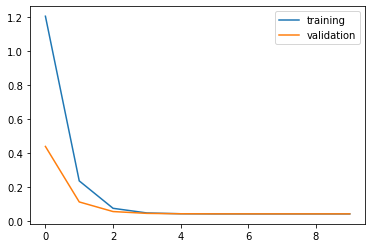

In [9]:
#we can visualize the evaluation of the loss during training
import matplotlib.pylab as plt

plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'validation')
plt.legend()
plt.show()

In [10]:
#take a look at the fitted parameters
print('True weights are:')
print(w)
print('')
print('Estimated weights are:')
print(lin_model.weights[0].numpy().flatten())
print('')
print('True bias is:')
print(b)
print('')
print('Estimated bias is:')
print(lin_model.weights[1].numpy().flatten())

True weights are:
[ 0.5 -1.   2. ]

Estimated weights are:
[ 0.49570015 -1.0028414   1.9957379 ]

True bias is:
1.0

Estimated bias is:
[0.99807703]


In [11]:
import numpy as np
import tensorflow as tf


###############################
#Binary classification problem
###############################


#sample size of 2,000 data points
m = 2000

#parameter values
w = np.array([1.2, -0.7, 0.2])
b = 0.5

#randomly generate feature values for three feature variables 
np.random.seed(42)
X = np.random.normal(size = 3 * m).reshape(m, 3)

#now we generate values for the probabilities of P(Y_i = 1) 
z = X.dot(w) + b 
pi = 1 / (1 + np.exp(-z))

#draw random Bernoulli numbers according to these probabilities
y = np.random.binomial(n = 1, p = pi)

#split the data in training and test data
train_fraction = 0.70
train_size = int(train_fraction * len(y))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

#define the model
binary_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = 'sigmoid', input_shape = [3])
])

#compile the model
binary_model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

#fit the model with 25 training steps
#by providing validation data to the function, test data gets evaluated on the fly during training
history = binary_model.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test), verbose = 0)

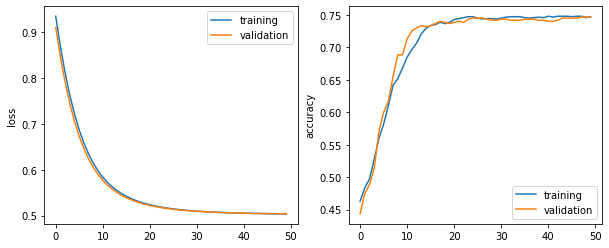

In [12]:
#we can visualize the evaluation of the loss and accuracy during training
fig, axes = plt.subplots(1, 2, figsize = (10,4))
axes[0].plot(history.history['loss'], label = 'training')
axes[0].plot(history.history['val_loss'], label = 'validation')
axes[0].set_ylabel('loss')
axes[0].legend()

axes[1].plot(history.history['accuracy'], label = 'training')
axes[1].plot(history.history['val_accuracy'], label = 'validation')
axes[1].set_ylabel('accuracy')
axes[1].legend()
plt.show()

In [13]:
#take a look at the fitted parameters
print('True weights are:')
print(w)
print('')
print('Estimated weights are:')
print(binary_model.weights[0].numpy().flatten())
print('')
print('True bias is:')
print(b)
print('')
print('Estimated bias is:')
print(binary_model.weights[1].numpy().flatten())

True weights are:
[ 1.2 -0.7  0.2]

Estimated weights are:
[ 1.1865218  -0.70878136  0.1799465 ]

True bias is:
0.5

Estimated bias is:
[0.51307243]


In [14]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

def softmax(z):
    return [np.exp(zk) / np.sum(np.exp(z)) for zk in z]

###############################
#Binary classification problem
###############################

#sample size of 2,000 data points
m = 2000

#parameter values
np.random.seed(42)
W = np.random.normal(size = 3 * 3).reshape(3, 3)
b = np.random.normal(size = 3)

#randomly generate feature values for three feature variables 
X = np.random.normal(size = 3 * m).reshape(m, 3)

#now we generate values for the probabilities of P(Y_i = 1), P(Y_i = 2), P(Y_i = 3) 
Z = X.dot(W) + b
pi = [softmax(z_i) for z_i in Z]

#draw random observations for Y_i, given probabilities pi_i
Y = [np.random.choice([1,2,3], size = 1, replace = False, p = p_i)[0] for p_i in pi]

#let us transform Y to a one hot format
Y = np.array(Y).reshape(-1, 1)
encoder = OneHotEncoder()
encoder.fit(Y)
y = encoder.transform(Y).toarray()

#split the data in training and test data
train_fraction = 0.70
train_size = int(train_fraction * len(y))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

#define the model
multi_model = tf.keras.Sequential([
    tf.keras.layers.Dense(y_train.shape[1], activation = 'softmax', input_shape = [3])
])

#compile the model
multi_model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

#fit the model with 50 training steps
#by providing validation data to the function, test data gets evaluated on the fly during training
history = multi_model.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test), verbose = 0)

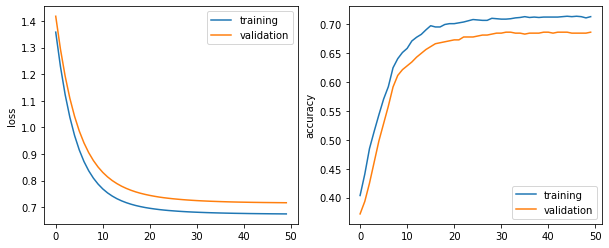

In [15]:
#we can visualize the evaluation of the loss and accuracy during training
fig, axes = plt.subplots(1, 2, figsize = (10,4))
axes[0].plot(history.history['loss'], label = 'training')
axes[0].plot(history.history['val_loss'], label = 'validation')
axes[0].set_ylabel('loss')
axes[0].legend()

axes[1].plot(history.history['accuracy'], label = 'training')
axes[1].plot(history.history['val_accuracy'], label = 'validation')
axes[1].set_ylabel('accuracy')
axes[1].legend()
plt.show()

In [16]:
#take a look at the fitted parameters
print('True weights are:')
print(W)
print('')
print('Estimated weights are:')
print(multi_model.weights[0].numpy())
print('')
print('True bias is:')
print(b)
print('')
print('Estimated bias is:')
print(multi_model.weights[1].numpy().flatten())

True weights are:
[[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]
 [ 1.57921282  0.76743473 -0.46947439]]

Estimated weights are:
[[ 0.1420517  -0.4404869   0.25770253]
 [ 0.96309954 -0.66934144 -0.5059118 ]
 [ 1.0049574   0.09079347 -0.95471317]]

True bias is:
[ 0.54256004 -0.46341769 -0.46572975]

Estimated bias is:
[ 0.70458204 -0.36992973 -0.3346519 ]


## Feature Importance

Again, we can make use of partial derivatives for predictions in response to changes of input features in order to derive feature importance with forward neural networks. Given estimated parameters, for each single prediction $\hat{f}_{\text{FNN}}(\boldsymbol{x}_{i})$, we can determine its sensitivity towards feature $x_{ij}$ by deriving: 

$$
\frac{\partial \hat{f}_{\text{FNN}}(\boldsymbol{x}_{i})}{\partial x_{ij}} 
$$

To gain insights regarding the global impact of feature $X_j$, we use the average of partial derivatives over all observations $i = 1, ..., m$. For the baseline algorithms the sign of the partial derivative was always identical for each observation. This must not hold true for forward neural networks with one or more hidden layers. This is why we use squared partial derivatives, average them and then use the square root:

$$
\sqrt{\frac{1}{n} \sum_i \left(\frac{\partial \hat{f}_{\boldsymbol{w}, b}(\boldsymbol{x}_{ij})}{\partial x_{ij}} \right)^2}
$$

Again, we will derive a normalizing value $C$ such that absolute values of feature importances over all features sum up to one. However by squaring partial derivatives for each observation, we loose track regarding the impact direction. To keep track of this, we define another function:

$$
sgn \left( \xi({x_j})\right) =  
\begin{cases}
- \xi({x_j}) & \text{if } \frac{1}{n} \sum_i \left(\frac{\partial \hat{f}_{\boldsymbol{w}, b}(\boldsymbol{x}_{ij})}{\partial x_{ij}} \right) < 0\\
\xi({x_j}) & \text{else }
\end{cases}
$$

Overall feature importance is defined as:

$$
FI_{x_j} = sgn \left( \frac{1}{C} \sqrt{\frac{1}{n} \sum_i \left(\frac{\partial \hat{f}_{\boldsymbol{w}, b}(\boldsymbol{x}_{ij})}{\partial x_{ij}} \right)^2} \right)
$$

While this might look rather complex, it really is not. What we are doing here, is to determine the average sensitivity of each prediction with respect to feature $j$. If on average the impact is negative, we assume the global impact to be negative, otherwise, we assume it to be positive. To derive feature importance, one needs to use auto-differentiation again, but this time with fixed parameters. This task can be conducted with tensorflow or other auto-differentiation libraries, such as the JAX package in Python. However, as this is can be a little challenging and is beyond the scope of this chapter, we omit the illustration of an example at this point. Nevertheless, once it is implemented, it can be analyzed which features contribute the most or the least to predictions, even though we use networks with multiple layers. In my opinion, this should significantly reduce the prejudice of neural networks being black boxes.